In [179]:
!pip install catboost
!pip install xgboost

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

In [180]:
df_dirty = pd.read_csv('D:\Machine Learning\winter.csv')

In [181]:
df_dirty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR         43 non-null     int64  
 1   SEASON       43 non-null     object 
 2   MAX_AVG      43 non-null     float64
 3   MIN_AVG      43 non-null     float64
 4   RAIN_AVG     43 non-null     float64
 5   RH_AVG       43 non-null     float64
 6   WIND_01_AVG  43 non-null     object 
 7   WIND_02_AVG  43 non-null     object 
dtypes: float64(4), int64(1), object(3)
memory usage: 2.8+ KB


In [182]:
df_dirty.head()

,YEAR,SEASON,MAX_AVG,MIN_AVG,RAIN_AVG,RH_AVG,WIND_01_AVG,WIND_02_AVG
0,1981,WINTER,26.033675,14.365710,0.895737,68.733295,2.475288,0.9135395
1,1982,WINTER,26.360003,13.609870,0.554915,67.398707,2.415822,0.886646333
2,1983,WINTER,25.594000,13.559120,0.881746,69.738737,2.579685,0.946638667
3,1984,WINTER,26.116280,14.068597,0.344828,67.263890,2.246681667,0.843617
4,1985,WINTER,27.387750,15.077077,0.097926,67.308907,1.986132667,0.745560667


In [183]:
print(df_dirty.columns)


Index(['YEAR', 'SEASON', 'MAX_AVG', 'MIN_AVG', 'RAIN_AVG', 'RH_AVG',
       'WIND_01_AVG', 'WIND_02_AVG'],
      dtype='object')


In [184]:
# Convert wind speed columns to numeric
df_dirty["WIND_01_AVG"] = pd.to_numeric(df_dirty["WIND_01_AVG"], errors="coerce")
df_dirty["WIND_02_AVG"] = pd.to_numeric(df_dirty["WIND_02_AVG"], errors="coerce")


<AxesSubplot:>

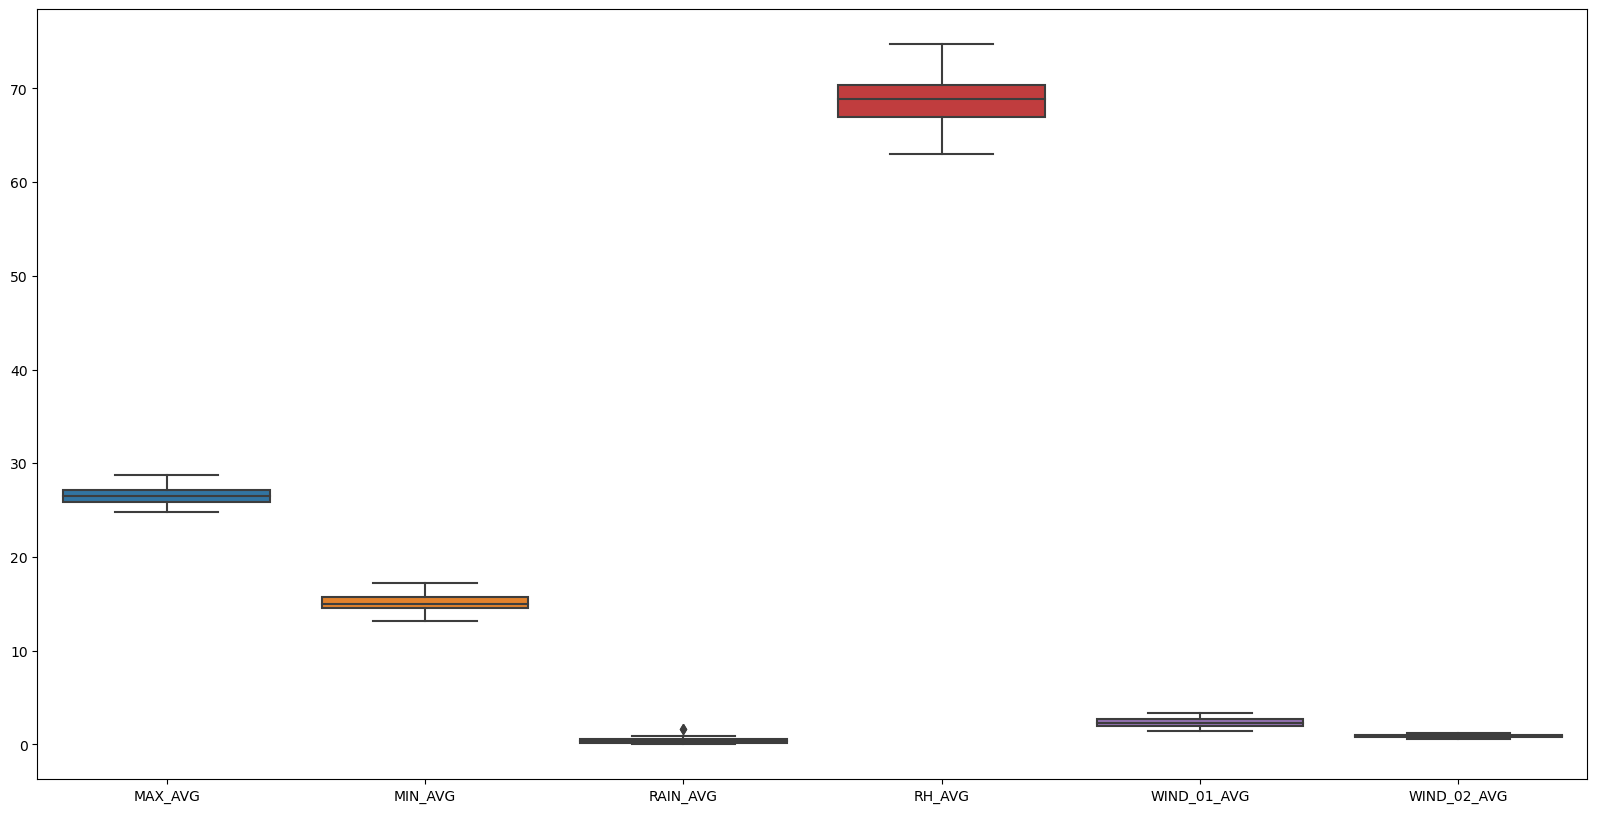

In [185]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df_dirty[[ 'MAX_AVG', 'MIN_AVG', 'RAIN_AVG', 'RH_AVG',
        'WIND_01_AVG','WIND_02_AVG']])

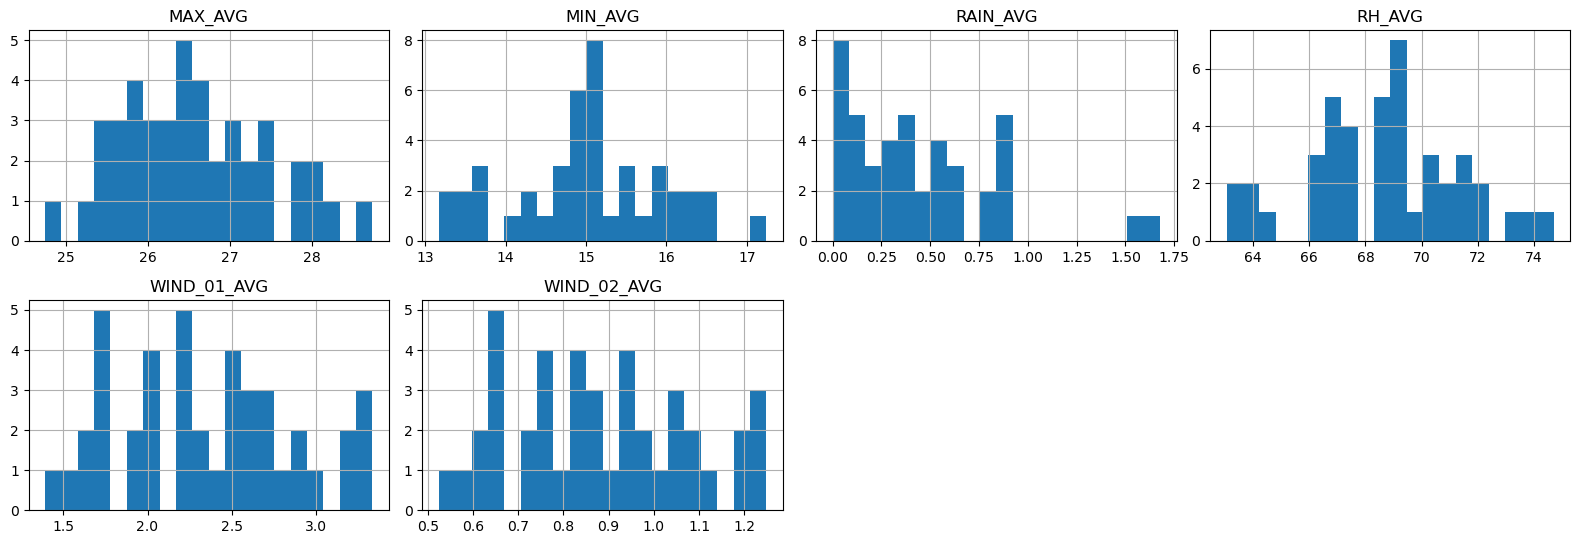

In [186]:
df_dirty.drop(['YEAR', 'SEASON'], axis=1).hist(layout=(3, 4), bins=20, figsize=(16, 8))
plt.tight_layout()
plt.show()

In [187]:
# select continous columns
selected_columns = df_dirty[["MAX_AVG",'MIN_AVG','RAIN_AVG','RH_AVG','WIND_01_AVG','WIND_02_AVG']]

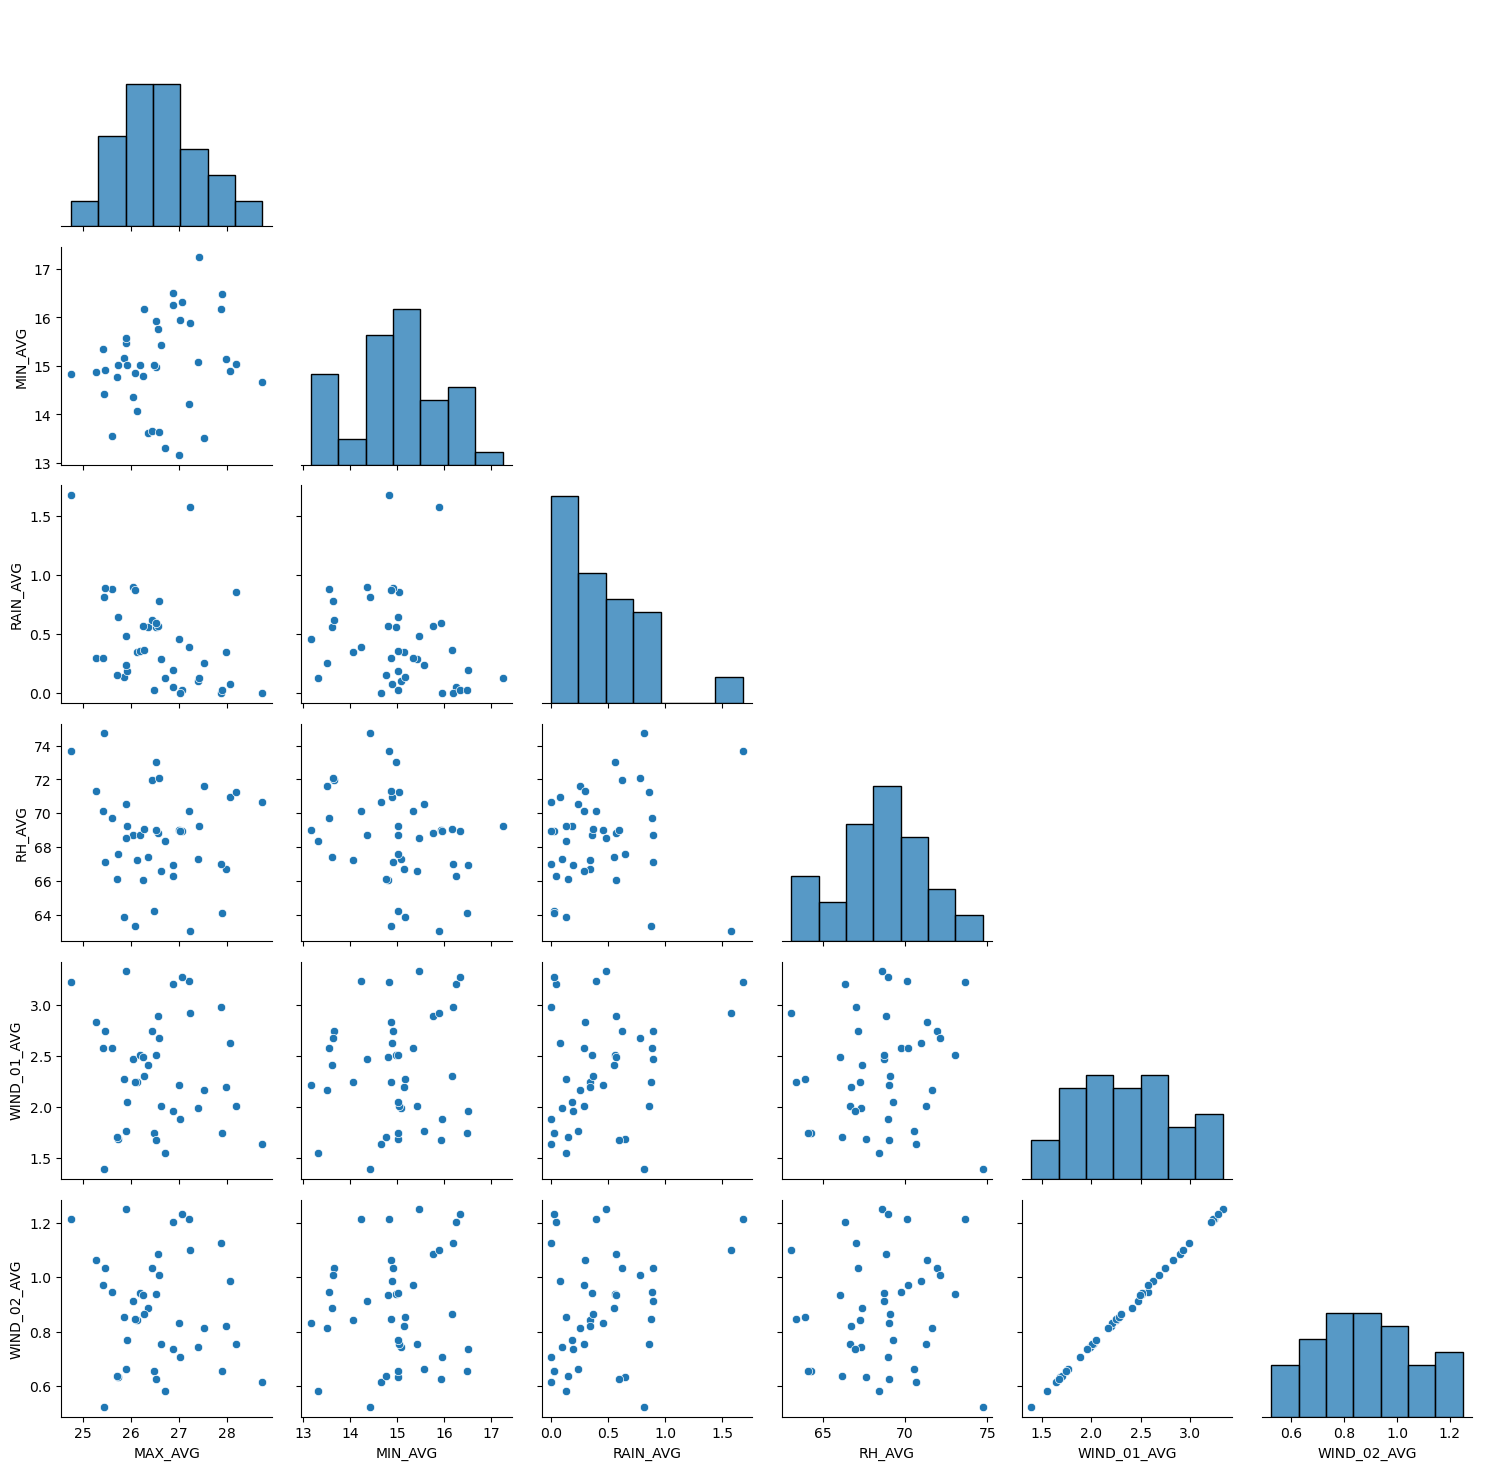

In [188]:
g = sns.PairGrid(selected_columns, corner=True)

g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

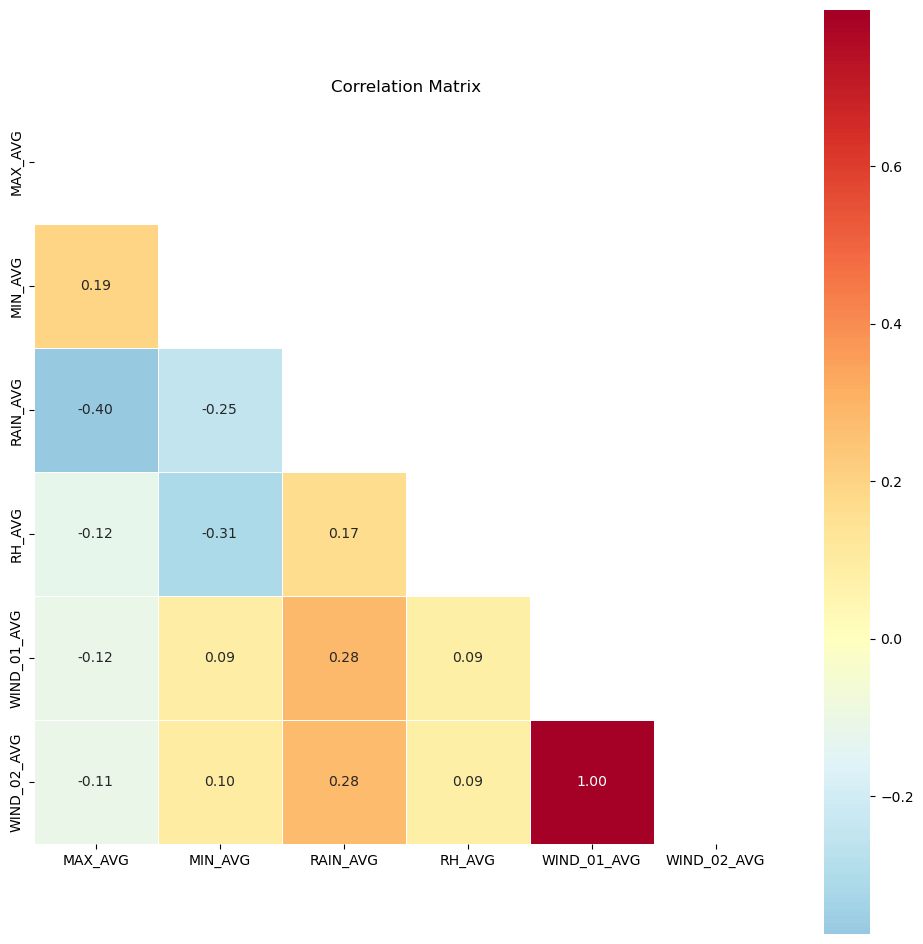

In [189]:
selected_corr = selected_columns.corr()

plt.figure(figsize=(12, 12))
mask = np.triu(np.ones_like(selected_corr, dtype=bool))
sns.heatmap(selected_corr, mask=mask, robust=True, center=0, square=True, cmap="RdYlBu_r", linewidths=0.6, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [190]:
X = df_dirty[['MAX_AVG','RAIN_AVG','MIN_AVG','RH_AVG',"WIND_01_AVG",'WIND_02_AVG']]
y = df_dirty['MIN_AVG']

In [191]:
# Init Scaler
scaler = StandardScaler()

# get numeric data
num_d = X.select_dtypes(exclude=['object'])

# update the cols with their normalized values
X[num_d.columns] = scaler.fit_transform(num_d)

In [192]:
# One hot encoding
X = pd.get_dummies(X)

In [193]:
# 80/20 % split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [196]:
# 1. Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
# 2. Ridge Regression
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
# 3. Lasso Regression
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
# 4. Decision Tree Regression
decision_tree_reg = DecisionTreeRegressor()
decision_tree_reg.fit(X_train, y_train)
y_pred_tree = decision_tree_reg.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
# 5. Random Forest Regression
random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(X_train, y_train)
y_pred_forest = random_forest_reg.predict(X_test)
mse_forest = mean_squared_error(y_test, y_pred_forest)
# 6. CatBoost Regression 
model = CatBoostRegressor()
# Fit model
model.fit(X_train, y_train, verbose=False)
# Get predictions
y_preds_catboost = model.predict(X_test)
# get mse
mse_catboost = mean_squared_error(y_test, y_preds_catboost)

# 7. XGBoost Regression
model = XGBRegressor()
# Fit model
model.fit(X_train, y_train, verbose=False)
# Get predictions
y_preds_xgboost = model.predict(X_test)
# get mse
mse_xgboost = mean_squared_error(y_test, y_preds_xgboost)

In [194]:
print(np.any(np.isnan(X_test)))  # Checks for NaN values
print(np.any(np.isinf(X_test)))  # Checks for infinity values

True
False


In [195]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
X_test = imputer.fit_transform(X_test)


In [197]:
results = pd.DataFrame(index=['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest', 'CatBoost', 'XGBoost'])

results['Mean Squared Error'] = [
    mse_linear,
    mse_ridge,
    mse_lasso,
    mse_tree,
    mse_forest,
    mse_catboost,
    mse_xgboost
]

In [198]:
results['R-squared'] = [
    r2_score(y_test, y_pred_linear),
    r2_score(y_test, y_pred_ridge),
    r2_score(y_test, y_pred_lasso),
    r2_score(y_test, y_pred_tree),
    r2_score(y_test, y_pred_forest),
    r2_score(y_test, y_preds_catboost),
    r2_score(y_test, y_preds_xgboost)
]
results.style.highlight_max(subset = ['R-squared'], color = 'green', axis = 0).highlight_min(subset = ['Mean Squared Error'], color = 'green', axis = 0)

,Mean Squared Error,R-squared
Linear Regression,0.000000,1.000000
Ridge Regression,0.001981,0.998528
Lasso Regression,1.419626,-0.055097
Decision Tree,0.084032,0.937545
Random Forest,0.106366,0.920947
CatBoost,0.168726,0.874599
XGBoost,0.100579,0.925247


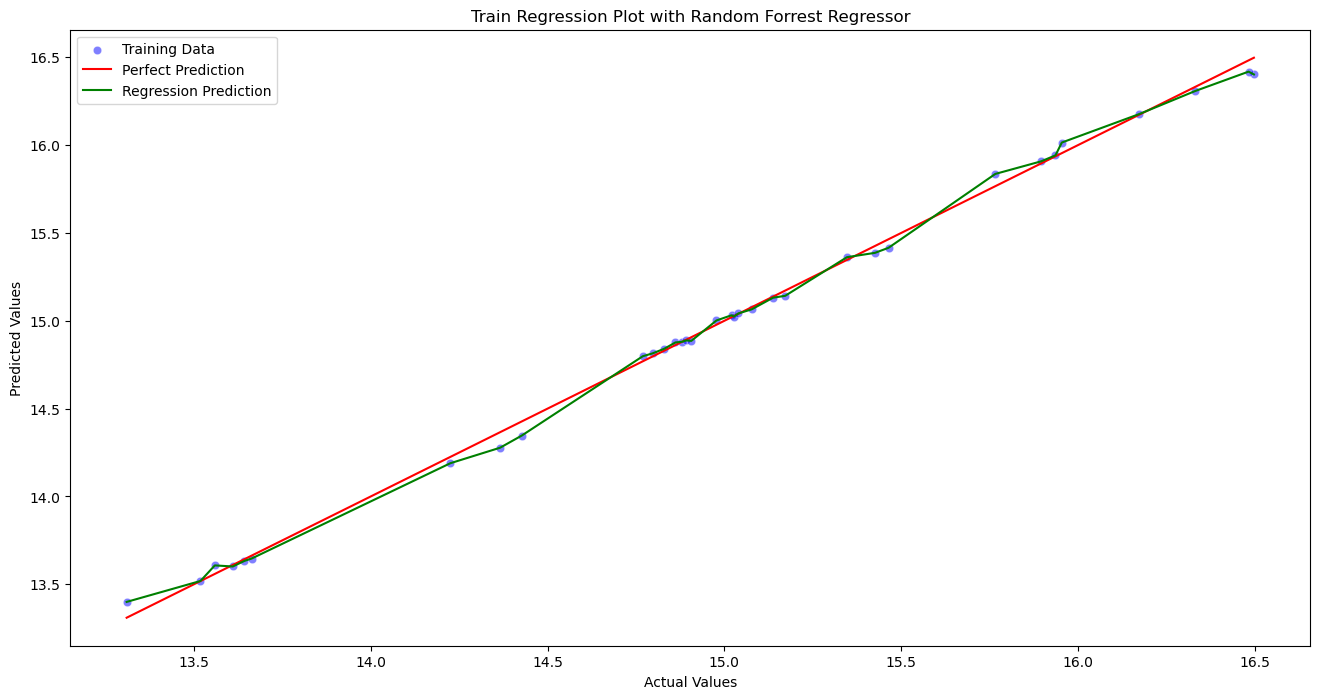

In [199]:
#Evaluate best model training fit

best_model = RandomForestRegressor()

best_model.fit(X_train, y_train)
y_pred_train = best_model.predict(X_train)

plt.figure(figsize=(16, 8))

sns.scatterplot(x=y_train, y=y_pred_train, color='blue', label='Training Data', alpha=.5)
sns.lineplot(x=y_train, y=y_train, color='red', label='Perfect Prediction')
sns.lineplot(x=y_train, y=y_pred_train, color='green', label='Regression Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Train Regression Plot with Random Forrest Regressor')

plt.legend()
plt.show()

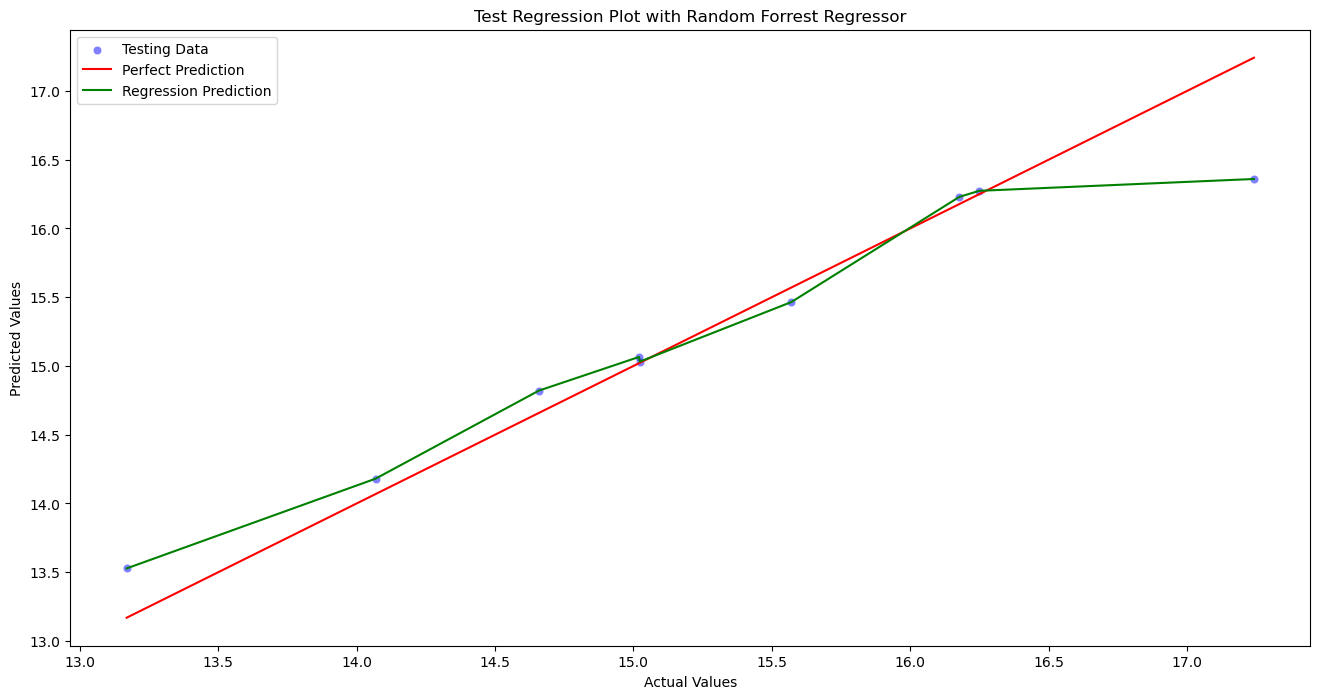

In [200]:
# Evaluate best model predictions
y_pred_test = best_model.predict(X_test)

plt.figure(figsize=(16, 8))

sns.scatterplot(x=y_test, y=y_pred_test, color='blue', label='Testing Data', alpha=.5)
sns.lineplot(x=y_test, y=y_test, color='red', label='Perfect Prediction')
sns.lineplot(x=y_test, y=y_pred_test, color='green', label='Regression Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test Regression Plot with Random Forrest Regressor')

plt.legend()
plt.show()

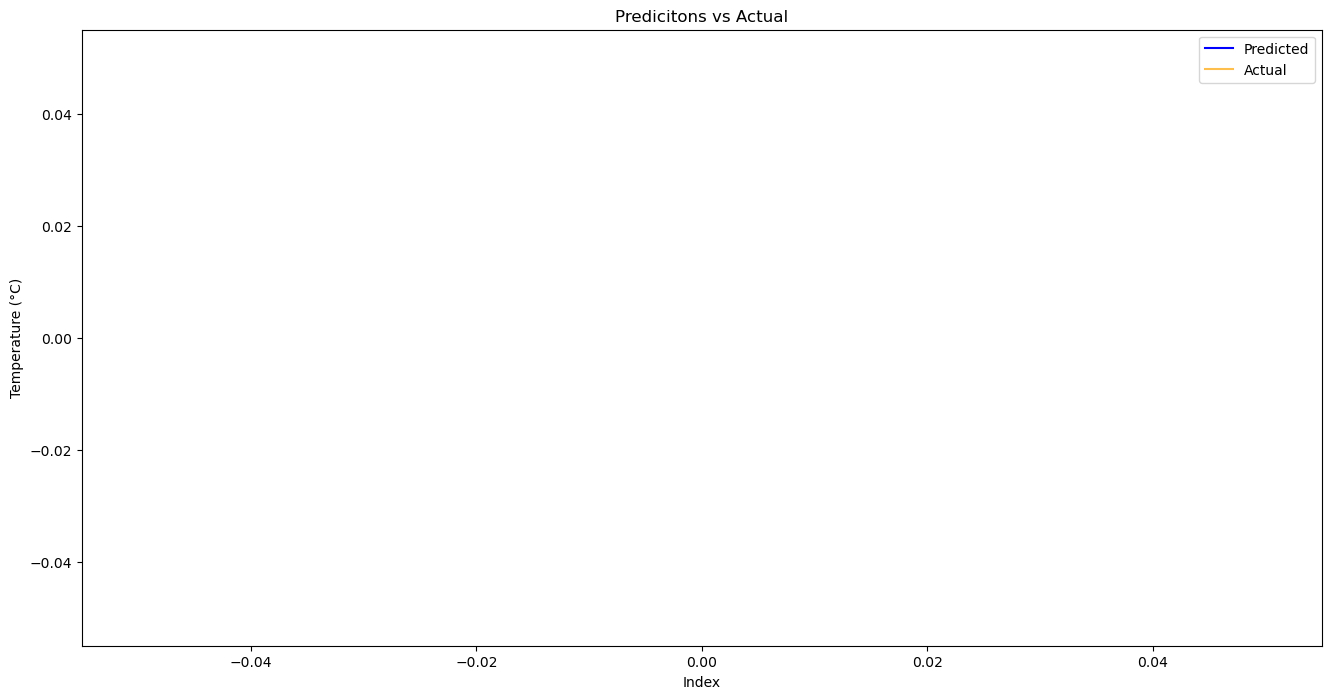

In [203]:
# Preds vs actual fit
df_dirty = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test}).reset_index()

plt.figure(figsize=(16, 8))

# get first 200 values
sns.lineplot(df_dirty[:200]['Predicted'], label='Predicted', color='blue')
sns.lineplot(df_dirty[:200]['Actual'], label='Actual', color='orange', alpha=.7)

plt.xlabel('Index')
plt.ylabel('Temperature (°C)')
plt.title('Predicitons vs Actual')

plt.legend()
plt.show()

In [202]:
# Importance Scores
feature_scores = pd.Series(best_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

MIN_AVG        0.977040
RAIN_AVG       0.007461
MAX_AVG        0.004954
WIND_02_AVG    0.004430
WIND_01_AVG    0.003226
RH_AVG         0.002889
dtype: float64